In [1]:
!pip install tensorflow

ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)
ERROR: No matching distribution found for tensorflow


In [ ]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np

# Load Fashion MNIST from openml
fashion_mnist = fetch_openml(name="Fashion-MNIST", version=1)

# Extract data and labels
X = fashion_mnist.data.values.reshape(-1, 28, 28)
y = fashion_mnist.target.astype(int)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Class labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Display sample images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X[i], cmap='gray')
    plt.title(class_names[y[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [3]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Load Fashion MNIST from openml
fashion_mnist = fetch_openml(name="Fashion-MNIST", version=1)

In [5]:
X = fashion_mnist.data.values.reshape(-1, 28, 28)
y = fashion_mnist.target.astype(int)

In [6]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (70000, 28, 28)
Shape of y: (70000,)


In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


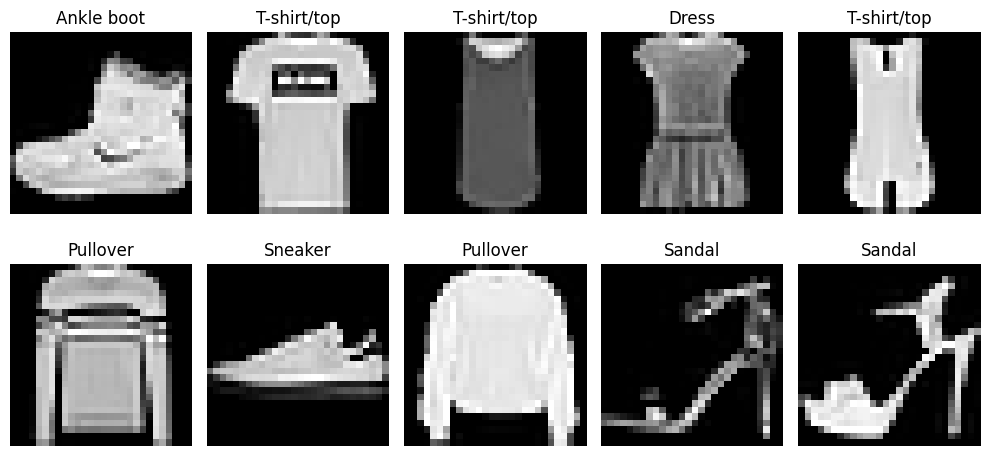

In [8]:
# Display sample images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X[i], cmap='gray')
    plt.title(class_names[y[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [9]:
import pandas as pd
import seaborn as sns

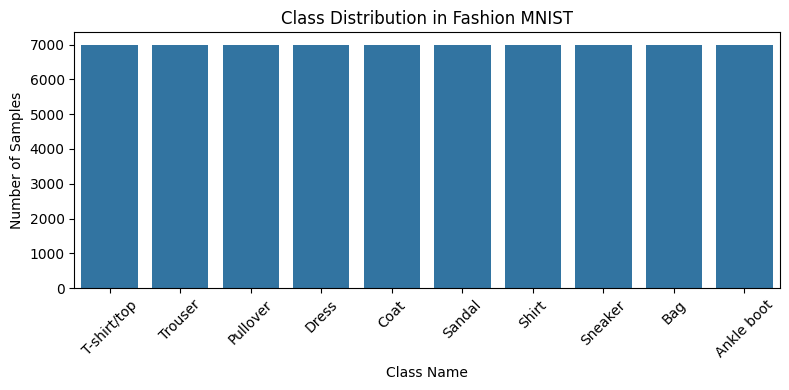

In [10]:
flat_X = X.reshape(X.shape[0], -1)

# 1. Class distribution
class_counts = pd.Series(y).value_counts().sort_index()
plt.figure(figsize=(8, 4))
sns.barplot(x=class_names, y=class_counts.values)
plt.xticks(rotation=45)
plt.title("Class Distribution in Fashion MNIST")
plt.ylabel("Number of Samples")
plt.xlabel("Class Name")
plt.tight_layout()
plt.show()


Pixel value range: 0 to 255


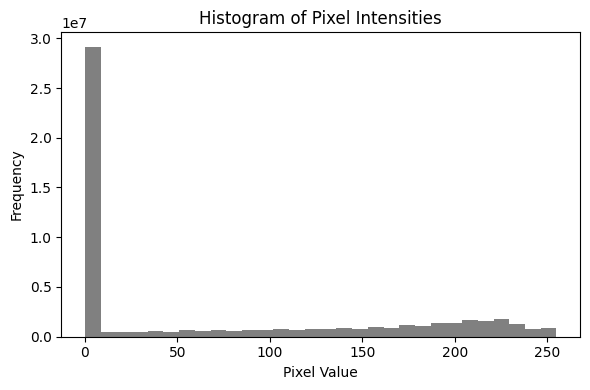

In [11]:
# 2. Basic statistics of pixel intensity
print("Pixel value range:", np.min(X), "to", np.max(X))

plt.figure(figsize=(6, 4))
plt.hist(flat_X.ravel(), bins=30, color='gray')
plt.title("Histogram of Pixel Intensities")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

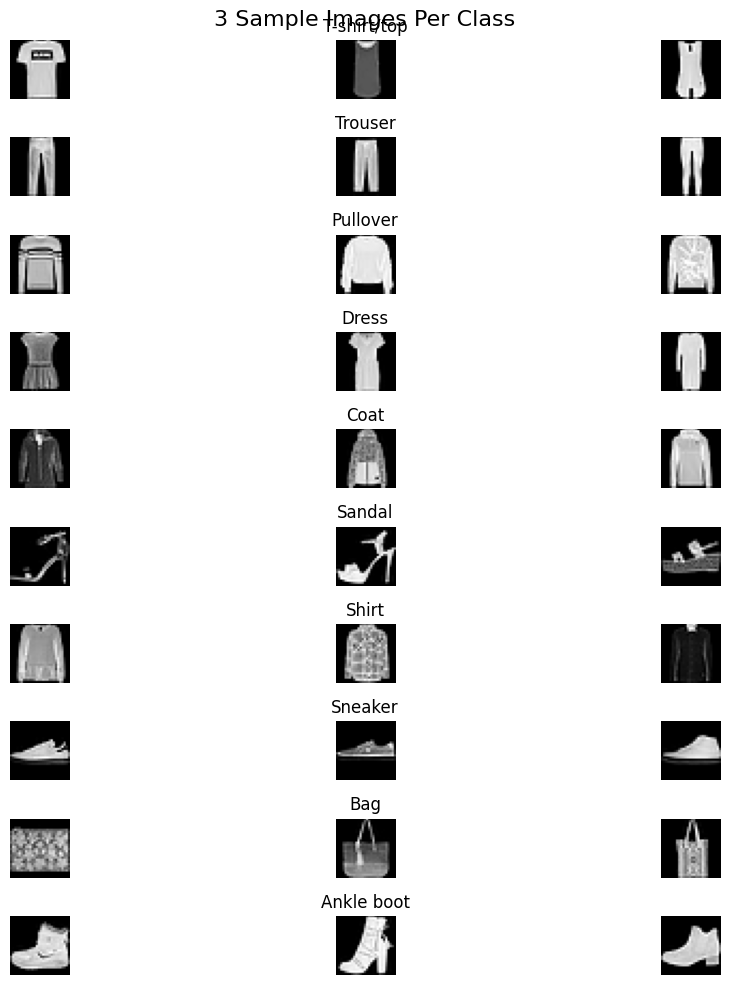

In [12]:
# 3. Display 3 samples per class
plt.figure(figsize=(12, 10))
for label in range(10):
    class_images = X[y == label]
    for i in range(3):
        plt.subplot(10, 3, label * 3 + i + 1)
        plt.imshow(class_images[i], cmap='gray')
        if i == 1:
            plt.title(class_names[label])
        plt.axis('off')
plt.suptitle("3 Sample Images Per Class", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

#  STEP 4: Data Preprocessing

In [13]:
from sklearn.model_selection import train_test_split

X = X / 255.0
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)

Training set: (60000, 28, 28)
Testing set: (10000, 28, 28)


In [14]:
X_train = X_train.reshape(-1, 1, 28, 28)
X_test = X_test.reshape(-1, 1, 28, 28)

y_train = y_train.astype(int)
y_test = y_test.astype(int)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)

X_train shape: (60000, 1, 28, 28)
X_test shape: (10000, 1, 28, 28)
y_train shape: (60000,)


# STEP 5: Building the CNN Model (with PyTorch)

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class FashionCNN(nn.Module):
    def __init__(self):
        super(FashionCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)    
        self.pool1 = nn.MaxPool2d(2, 2)                

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)    
        self.pool2 = nn.MaxPool2d(2, 2)                  

        self.fc1 = nn.Linear(64 * 5 * 5, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))  
        x = self.pool2(F.relu(self.conv2(x)))  
        x = x.view(-1, 64 * 5 * 5)             
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [18]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# Convert labels from Series to NumPy arrays
y_train = y_train.values
y_test = y_test.values

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


In [19]:
import torch.optim as optim

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = FashionCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(5):  
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}")


Epoch 1, Loss: 0.5309
Epoch 2, Loss: 0.3486
Epoch 3, Loss: 0.2971
Epoch 4, Loss: 0.2636
Epoch 5, Loss: 0.2379


# STEP 6: Model Evaluation & Metrics

In [20]:
correct = 0
total = 0

model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")


Test Accuracy: 90.05%


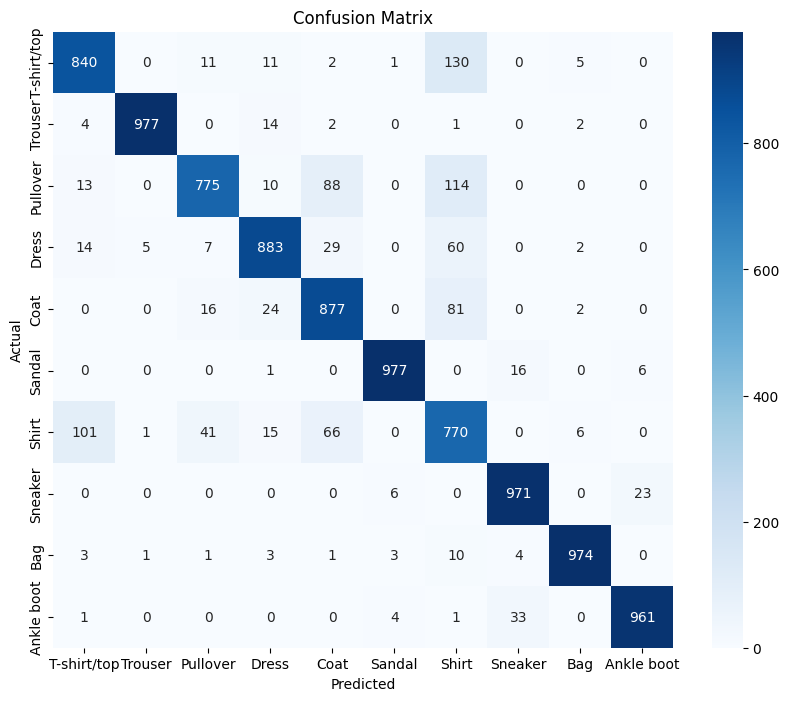

In [21]:
from sklearn.metrics import confusion_matrix, classification_report
all_preds = []
all_labels = []

model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.numpy())

# Confusion matrix
cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [22]:
print("Classification Report:\n")
print(classification_report(all_labels, all_preds, target_names=class_names))


Classification Report:

              precision    recall  f1-score   support

 T-shirt/top       0.86      0.84      0.85      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.91      0.78      0.84      1000
       Dress       0.92      0.88      0.90      1000
        Coat       0.82      0.88      0.85      1000
      Sandal       0.99      0.98      0.98      1000
       Shirt       0.66      0.77      0.71      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.97      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



### This gives:

* Precision: TP / (TP + FP)
* Recall: TP / (TP + FN)
* F1-score: Harmonic mean of Precision & Recall

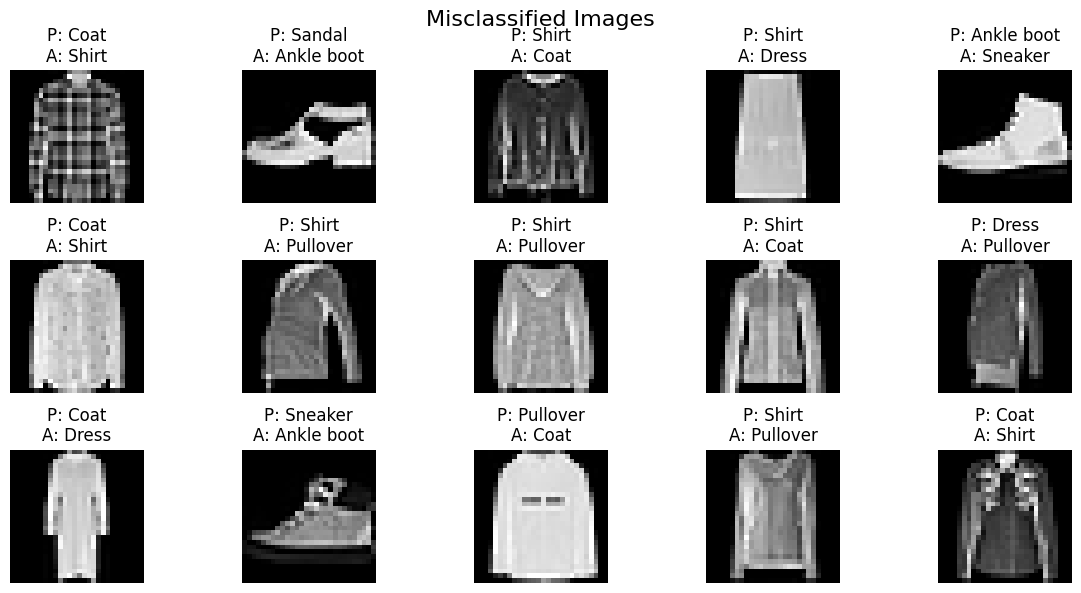

In [23]:
misclassified = []

model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        for img, pred, actual in zip(images.cpu(), preds.cpu(), labels):
            if pred != actual:
                misclassified.append((img, pred.item(), actual.item()))
            if len(misclassified) >= 15:
                break

plt.figure(figsize=(12, 6))
for i, (img, pred, actual) in enumerate(misclassified[:15]):
    plt.subplot(3, 5, i+1)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f"P: {class_names[pred]}\nA: {class_names[actual]}")
    plt.axis('off')
plt.tight_layout()
plt.suptitle("Misclassified Images", fontsize=16)
plt.subplots_adjust(top=0.88)
plt.show()


#   Step 7:Model Interpretability

In [24]:
activation = {}

def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook
model.conv1.register_forward_hook(get_activation('conv1'))


In [25]:
sample_img = X_test[0]
sample_tensor = torch.tensor(sample_img, dtype=torch.float32).unsqueeze(0).to(device)
model.eval()
with torch.no_grad():
    output = model(sample_tensor)
act = activation['conv1'].cpu().squeeze()  # Shape: (32, 26, 26)


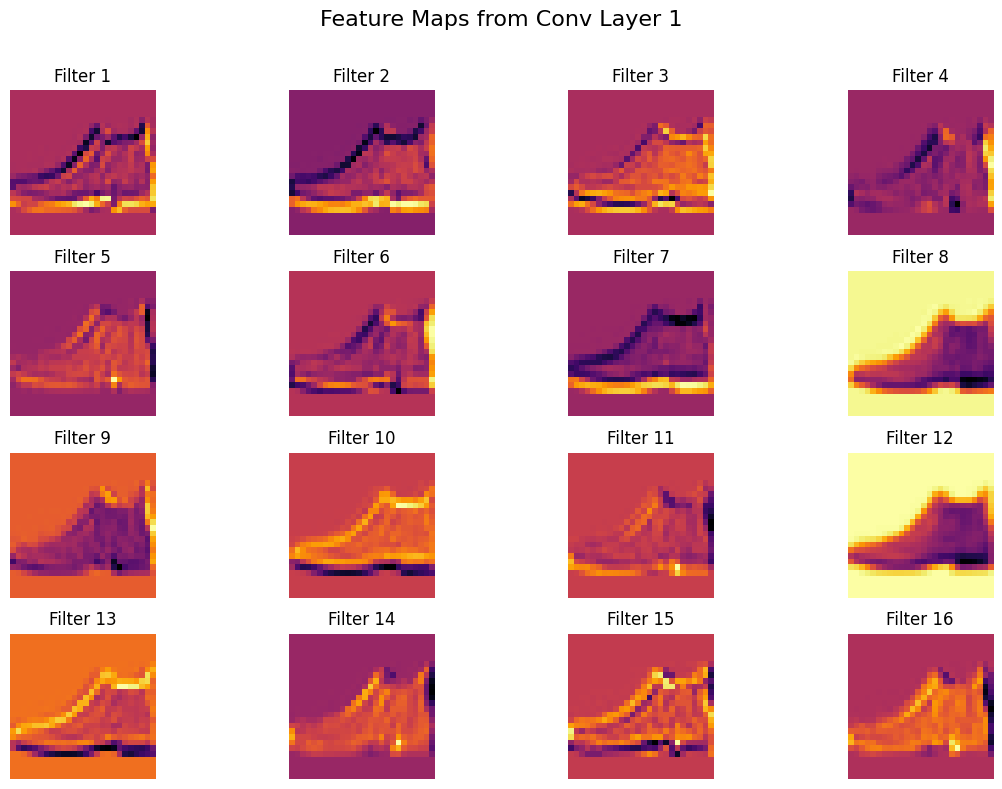

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
for i in range(16):  # Show first 16 filters
    plt.subplot(4, 4, i + 1)
    plt.imshow(act[i], cmap='inferno')
    plt.axis('off')
    plt.title(f"Filter {i+1}")
plt.suptitle("Feature Maps from Conv Layer 1", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()


### This Shows:
* Each image represents how one filter responds to the input image
* We can see edges, shapes, and textures
* These are the learned patterns the CNN uses to distinguish between clothing types